<h3 align="center">Employee Turnover Prediction</h3>

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('HR_comma_sep.csv')

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
df.drop_duplicates(keep="first", inplace=True)

In [9]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

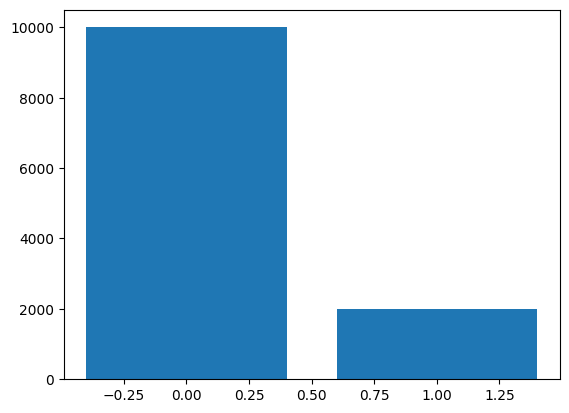

In [10]:
left_counts = df['left'].value_counts()
plt.bar(left_counts.index, left_counts.values)
plt.show()

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df['Department'] = le.fit_transform(df['Department'])
df['salary'] = le.fit_transform(df['salary'])

<Axes: >

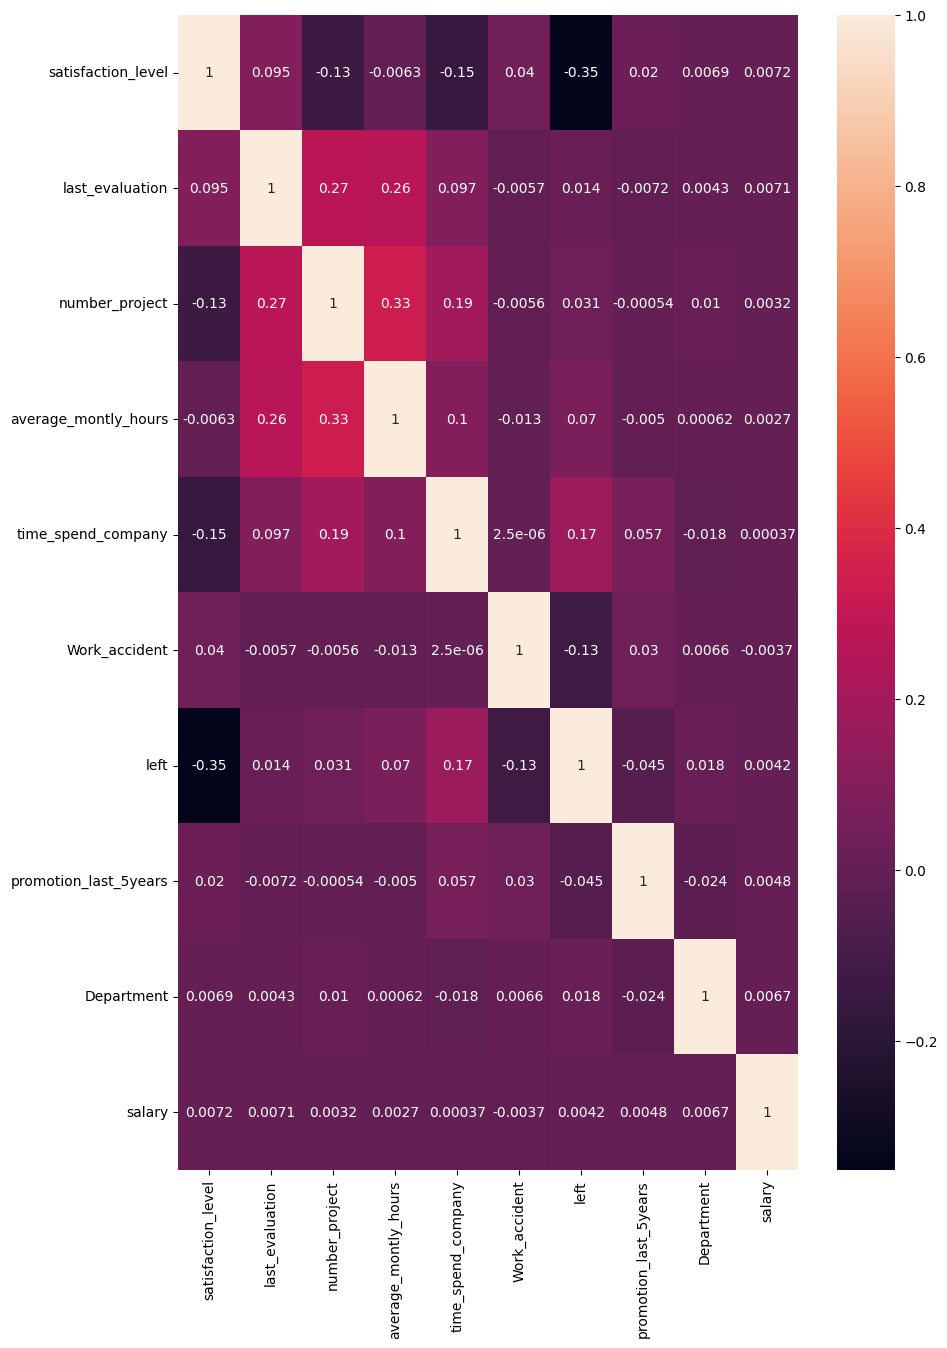

In [16]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(), annot=True)

In [17]:
x = df[['satisfaction_level','last_evaluation','average_montly_hours','Department','promotion_last_5years','time_spend_company', 'salary']]

In [18]:
y = df['left']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [21]:
X_resampled = pd.DataFrame(X_resampled, columns=x.columns)
y_resampled = pd.Series(y_resampled)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
re_model = RandomForestClassifier()
re_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [27]:
pred = re_model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [28]:
accuracy_score(y_test , pred)

0.9666527719883284

In [29]:
precision_score(y_test , pred)

0.9042821158690176

In [30]:
confusion_matrix(y_test, pred)

array([[1960,   38],
       [  42,  359]], dtype=int64)